## Additional Goals: Incorporating additional texts
In this Jupyter notebook, we train an unsupervised HMM on the Bee Movie Script in addition to the given Shakespearean sonnets and generate a 14-line sonnet. 

In [2]:
import os
import re
import pyphen
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

### Training Unsupervised HMM

#### Combining additional text files

In [60]:
bee = open(os.path.join(os.getcwd(), 'data/bee_movie.txt')).read()
# Remove dashes
bee = re.sub('-', '', bee)
# print(bee)
# Remove numbers
shakespeare = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
shakespeare = "".join(filter(lambda x: not x.isdigit(), shakespeare)) 

In [61]:
# Combining Shakespeare and Bee movie script text files
text = shakespeare + bee
text = text.lower().strip()
# print(text)
obs, obs_map = parse_observations(text)

#### Helper Functions

In [26]:
# Uses the pyphen package to get the number of syllables for a given word
def syllables(word):
    dic = pyphen.Pyphen(lang='en')
    syl = dic.inserted(word).split('-')
    return len(syl)

In [99]:
def get_sample_sonnet(hmm, obs_map):
    # Total of 14 lines, 10 syllables each. There are 3 quatrains (4 lines) and 1 couplet (2 lines)
    sonnet = ""
    full = sample_sentence(hmm, obs_map, n_words=150).split()
    line_syllable = 0
    line_num = 0
    for word in full:
        if line_syllable == 0:
            word = word.capitalize()
        sonnet += word + " "
        
        line_syllable += syllables(word)
    
        if line_syllable >= 10:
            # creating new line once we go over 10 syllables, but syllables do not carry over to next line
            line_syllable = 0
            line_num += 1
            sonnet += "\n"
            if line_num % 4 == 0:
                sonnet += "\n"
        if line_num == 14:
            # once we have over 14 lines we return our sonnet
            break
    return sonnet

#### Sample Sonnet Outputs with Bee Movie Script

In [51]:
# Testing model using 1 hidden layer
hmm1 = unsupervised_HMM(obs, 1, 10)

In [79]:
print(get_sample_sonnet(hmm1, obs_map))

Know love for tears first anyway these it shouldnt 
Is a and mine dont thy get rank shouldst of 
Your my cannot ready niggard seem do his 
Work from love and that feel in move called lords 

Part theres tempteth and thing sweets do that with hast 
Honeybee bye me live and least reckoned 
Not which thy then an sheaves thief and on all 
Pouring so wilt tired love have issue desiring 

Their seeking this from oaths shame influence 
Know my forbear dost if white will to goest 
Is will doth favour hath chopsticks of you into 
Of glass what hopes can not harsh wretched speak 

Ladies neglected delights needs one wide yet 
Though whilst commit five think thinking do me 



In [18]:
# Training model using 10 hidden layers
hmm10 = unsupervised_HMM(obs, 10, 100)

In [80]:
print('Sample Sonnet (HMM10):\n====================')
print(get_sample_sonnet(hmm10, obs_map))

Sample Sonnet (HMM10):
Within pray of do graced shall alone they take 
Lends that art what which with wouldst decease him 
Thou my from stands oome years grace like clears trouble 
Memory worth health old self this a outward 

And are me yet our may drained them with the 
Sad bee most worthy olassy onset refusest 
Stoln to belong these and and to haphazardly 
Snap wretched ready on be power truly 

Comfort day the sense up to i stopped bastard 
Sting thy but cold long here dearths a hold it 
Well it dave time to times was a faults amends 
For then leave alone lifesaver mistress since prove 

Grace them face that know of to you bees its 
In you little than spirit with again an 



In [20]:
# Training model using 16 hidden layers
hmm16 = unsupervised_HMM(obs, 16, 100)

In [94]:
print('Sample Sonnet (HMM16):\n====================')
print(get_sample_sonnet(hmm16, obs_map))

Sample Sonnet (HMM16):
Farther say and gilded the perfect time 
I are bar move on his other him show 
Woe order it sweet supporting it are 
Extreme was without it with the self light 

Thy bees preventst thou moan kind art hours of 
Thou lions to do the plane lend whats a 
Couple askance lived glad life gives i sorry 
No puff lips borne my hand sure he thought need 

I less do i blow just assailed thee job 
The plague all death sorry that is does i 
Be hear me know where have you was not much 
Flame considered swift some information 

Roller all the mine cloud here dying are i 
When for those when sweets so where correspondence 



### Visualization

#### Overall Wordcloud over all text files

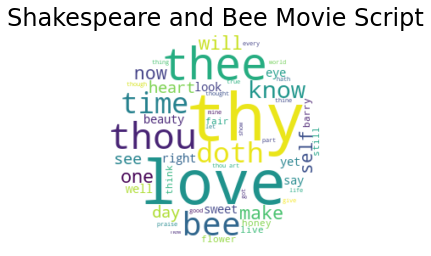

In [95]:
wordcloud = text_to_wordcloud(text, title='Shakespeare and Bee Movie Script')

#### Wordclouds for Each Hidden State

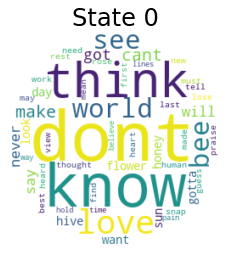

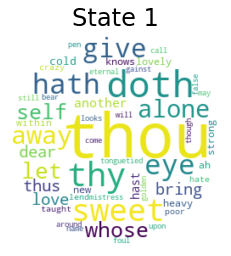

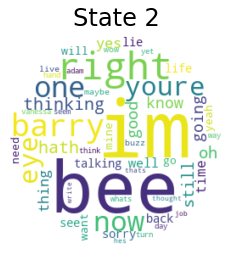

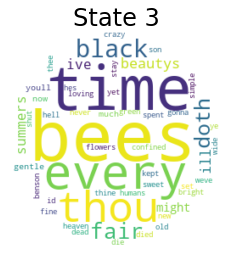

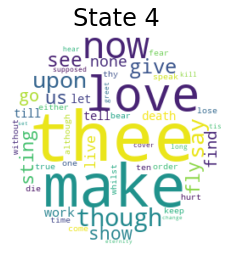

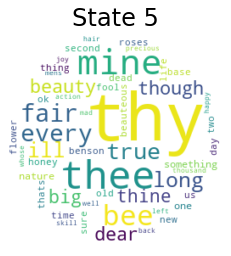

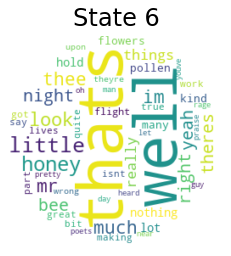

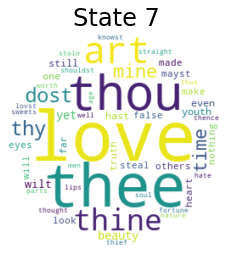

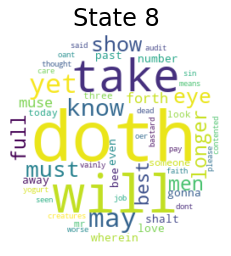

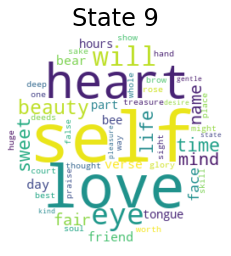

In [96]:
wordclouds = states_to_wordclouds(hmm10, obs_map)

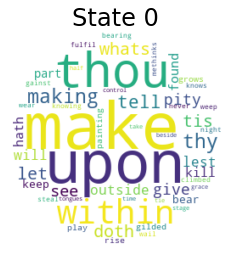

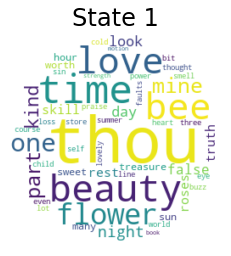

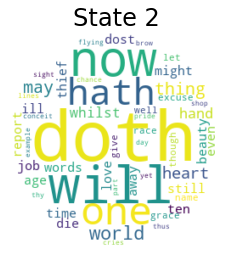

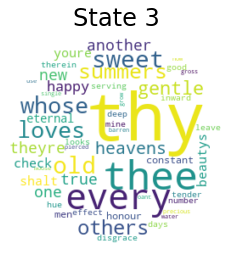

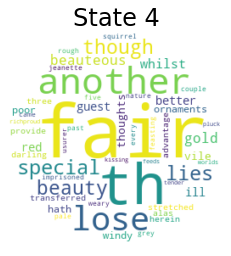

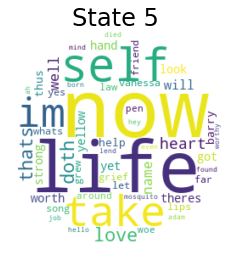

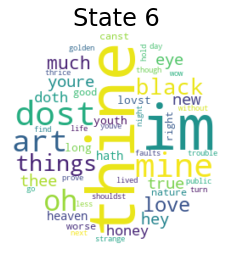

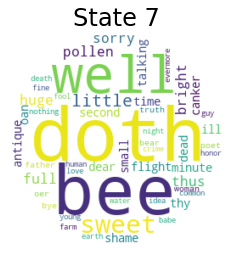

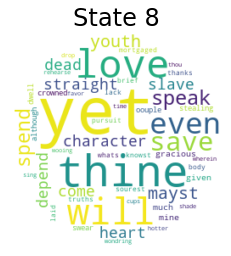

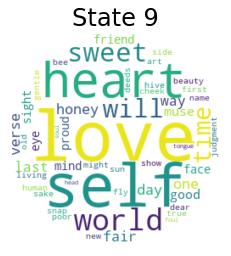

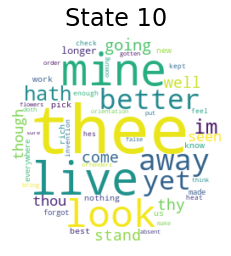

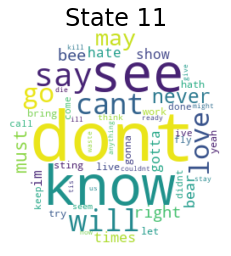

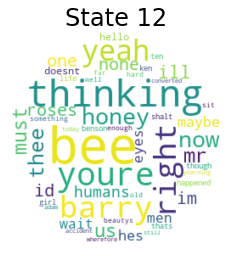

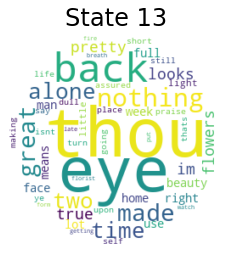

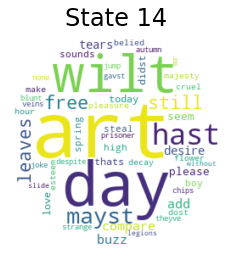

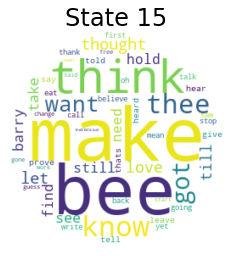

In [97]:
wordclouds = states_to_wordclouds(hmm16, obs_map)